In [1]:
import pandas            as pd
import networkx          as nx
import matplotlib.pyplot as plt
import seaborn           as sns

from utils  import construct_prop_df, construct_graph
from config import PATH, THRESHOLDS, RT_UNDER_COLUMNS

In [2]:
EXCLUDE_COLUMNS = ['tweet_id', 'poster', 'tweet', 'label']

In [3]:
df = pd.read_csv(PATH + 'dataset_enhanced.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1490 non-null   int64  
 1   tweet               1490 non-null   object 
 2   label               1490 non-null   object 
 3   poster              1490 non-null   int64  
 4   num_rt              1490 non-null   int64  
 5   depth_max           1490 non-null   int64  
 6   depth_avg           1490 non-null   float64
 7   time_total          1490 non-null   float64
 8   time_avg            1490 non-null   float64
 9   rts_half_life       1490 non-null   float64
 10  num_circles         1490 non-null   int64  
 11  rts_under_5_min     1490 non-null   int64  
 12  rts_under_30_min    1490 non-null   int64  
 13  rts_under_60_min    1490 non-null   int64  
 14  rts_under_180_min   1490 non-null   int64  
 15  rts_under_480_min   1490 non-null   int64  
 16  rts_un

In [8]:
def stats_analysis(df):
    stats           = []
    df_filtered = df.drop(columns=EXCLUDE_COLUMNS)
        
    means   = df_filtered.mean().round(2)
    stds    = df_filtered.std().round(2)
    medians = df_filtered.median().round(2)
    
    summary_df = pd.DataFrame({
    'Mean':   means,
    'STD':    stds,
    'Median': medians
})

    return summary_df

def stats_analysis_per_label(dfs, titles):
    stats = {}
    for dfi, t in zip(dfs, titles):
        stats[t] = stats_analysis(dfi)

    return pd.concat(stats, axis=1)

stats_analysis(df)

,Mean,STD,Median
num_rt,406.58,431.19,264.00
depth_max,3.63,1.55,3.00
depth_avg,1.28,0.31,1.17
time_total,77295.00,185750.58,11768.37
time_avg,3588.45,62507.90,330.71
rts_half_life,0.98,0.08,0.99
num_circles,4.81,8.93,2.00
rts_under_5_min,54.57,69.56,36.00
rts_under_30_min,149.39,169.71,100.00
rts_under_60_min,193.77,212.82,131.50


In [ ]:
# remove all_caps count, all 0
df = df.drop(columns = ['num_all_caps'])

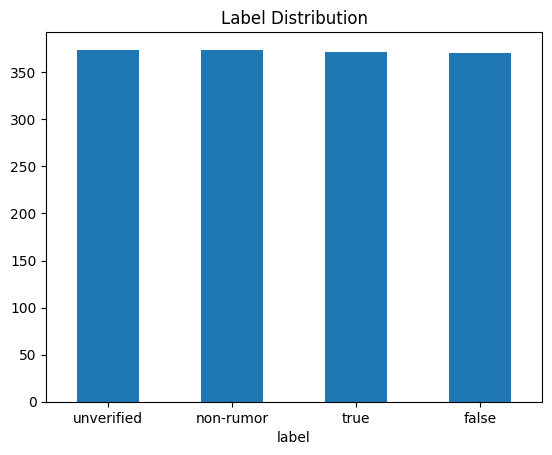

In [10]:
ax = df['label'].value_counts().plot(kind='bar', title="Label Distribution")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [11]:
# mapping and separation
label_mapping = {label: idx for idx, label in enumerate(sorted(set(df['label'])))}
print('Label Mapping')
print(label_mapping)
df['label'] = df['label'].map(label_mapping)

dfs    = []
titles = []
for t, l in label_mapping.items():
    dfs.append(df[df['label'] == l])
    titles.append(t)

Label Mapping
{'false': 0, 'non-rumor': 1, 'true': 2, 'unverified': 3}


In [12]:
stats_analysis_per_label(dfs, titles)

false                      non-rumor            \
                         Mean        STD    Median      Mean       STD   
num_rt                 360.64     419.74    211.50    643.03    486.81   
depth_max                3.58       1.53      3.00      3.82      1.59   
depth_avg                1.29       0.32      1.17      1.27      0.31   
time_total          116055.24  274436.90  10257.75  66492.81  90788.64   
time_avg             10555.46  124911.66    381.94    856.48   2375.65   
rts_half_life            0.97       0.10      0.99      0.99      0.01   
num_circles              6.24       9.97      2.00      4.22      6.90   
rts_under_5_min         40.15      61.83     26.00     93.60     90.94   
rts_under_30_min       118.01     157.36     84.00    249.64    220.84   
rts_under_60_min       155.85     198.20    106.00    319.46    270.74   
rts_under_180_min      221.54     263.77    143.00    432.61    341.89   
rts_under_480_min      272.30     326.57    172.00    520.05    398.03   
rts_under_720_min      287.02     341.20    178.00    552.42    418.17   
rts_under_1440_min     310.42     363.90    188.50    595.22    444.60   
length                  89.79      24.35     93.00     88.50     24.74   
num_words               14.99       4.31     15.00     14.92      4.35   
num_urls                 1.29       0.73      1.00      1.44      0.59   
num_mentions             0.20       0.56      0.00      0.28      0.64   
num_hashtags             0.44       0.68      0.00      0.28      0.54   
num_emoji                0.08       0.45      0.00      0.05      0.24   
num_punc                 2.58       2.04      2.00      2.37      2.03   
day_1_perc               0.90       0.19      0.97      0.93      0.09   

                                  true                     unverified  \
                      Median      Mean        STD   Median       Mean   
num_rt                477.00    331.31     358.42   201.50     290.43   
depth_max               3.00      3.45       1.50     3.00       3.66   
depth_avg               1.14      1.26       0.28     1.15       1.33   
time_total          22540.80  84103.59  201603.46  7664.55   42979.34   
time_avg              394.22   1530.35    6413.41   220.27    1475.02   
rts_half_life           1.00      0.97       0.10     0.99       0.97   
num_circles             2.00      3.92       8.73     1.00       4.85   
rts_under_5_min        72.00     51.89      53.60    39.50      32.47   
rts_under_30_min      197.50    137.63     132.77    99.50      91.88   
rts_under_60_min      250.50    176.68     173.10   125.50     122.58   
rts_under_180_min     334.50    237.20     236.11   153.50     176.63   
rts_under_480_min     405.00    275.58     282.23   171.50     214.28   
rts_under_720_min     425.00    288.92     302.09   180.50     229.70   
rts_under_1440_min    449.50    305.21     324.56   186.00     253.88   
length                 92.00     93.42      21.40    95.00      98.70   
num_words              15.00     15.81       3.93    16.00      16.18   
num_urls                1.00      1.27       0.68     1.00       1.17   
num_mentions            0.00      0.11       0.40     0.00       0.20   
num_hashtags            0.00      0.35       0.77     0.00       0.59   
num_emoji               0.00      0.13       2.34     0.00       0.07   
num_punc                2.00      2.81       1.96     2.00       2.73   
day_1_perc              0.96      0.94       0.14     0.98       0.90   

                                        
                          STD   Median  
num_rt                 354.70   170.00  
depth_max                1.56     3.00  
depth_avg                0.33     1.23  
time_total          108281.26  7624.20  
time_avg              7143.97   329.50  
rts_half_life            0.06     0.99  
num_circles              9.67     2.00  
rts_under_5_min         46.65    22.00  
rts_under_30_min        98.31    69.00  
rts_under_60_min       127.32    88.00  
rt

In [13]:
def plot_avg_retweet_speed(dfs, titles):
    plt.figure(figsize=(12, 8))
    
    for df, t in zip(dfs, titles):
        average_retweets = df[RT_UNDER_COLUMNS].mean()
        plt.plot(THRESHOLDS[1:], average_retweets, label=t)
    
    plt.xlabel('Time (minutes)')
    plt.ylabel('AVG # Retweets')
    plt.title('Comparison of AVG Retweets Over Time - Day 1')
    plt.legend()
    plt.show()

    return None

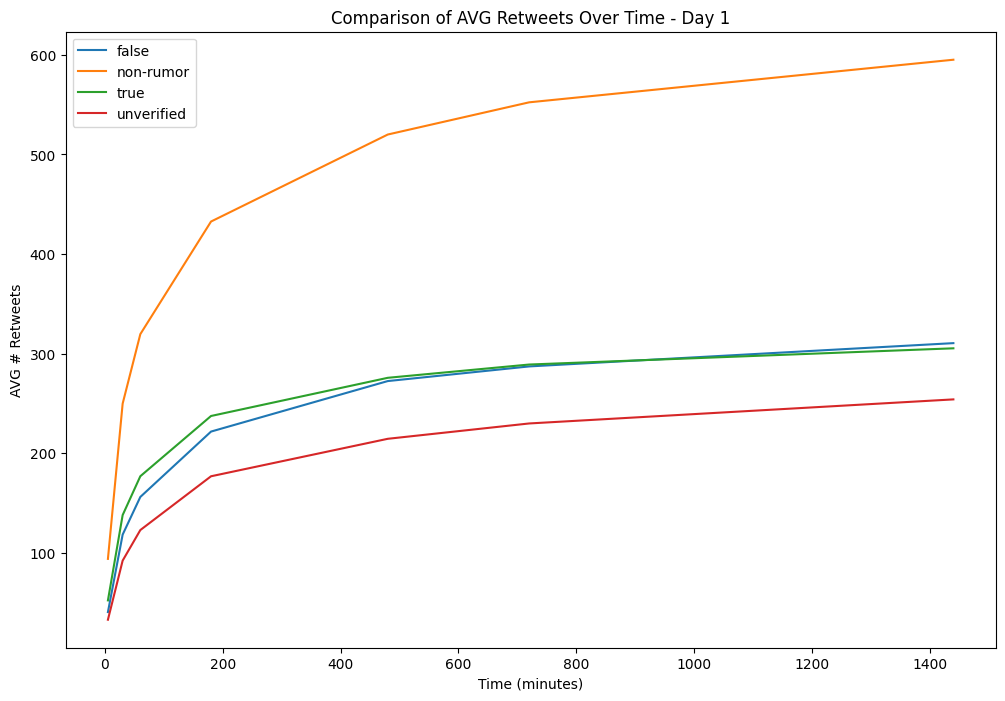

In [9]:
plot_avg_retweet_speed(dfs, titles)

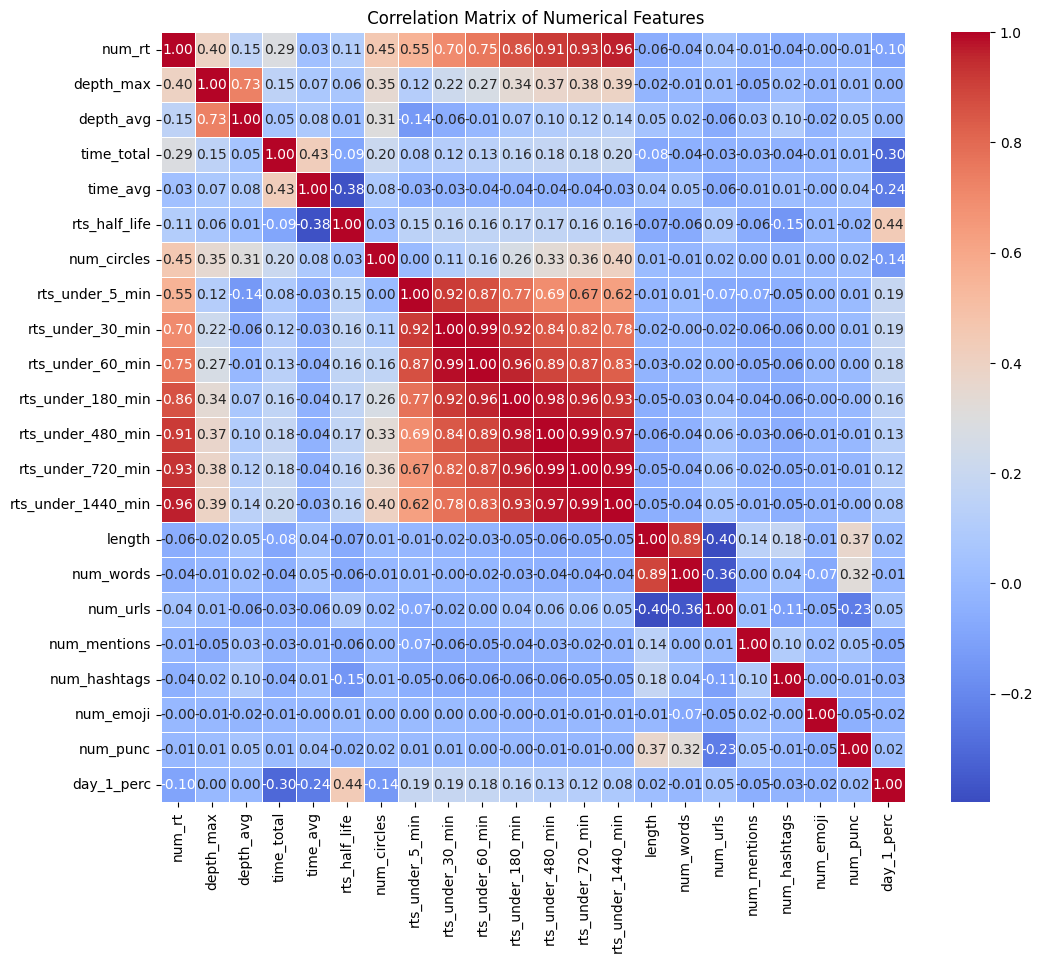

In [14]:
def correlation(df, title = ''):
    df_filtered = df.drop(columns=EXCLUDE_COLUMNS)
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"{title} Correlation Matrix of Numerical Features")
    plt.show()

def correlation_per_label(dfs, titles):
    for dfi, t in zip(dfs, titles):
        correlation(dfi, t)
        
correlation(df)

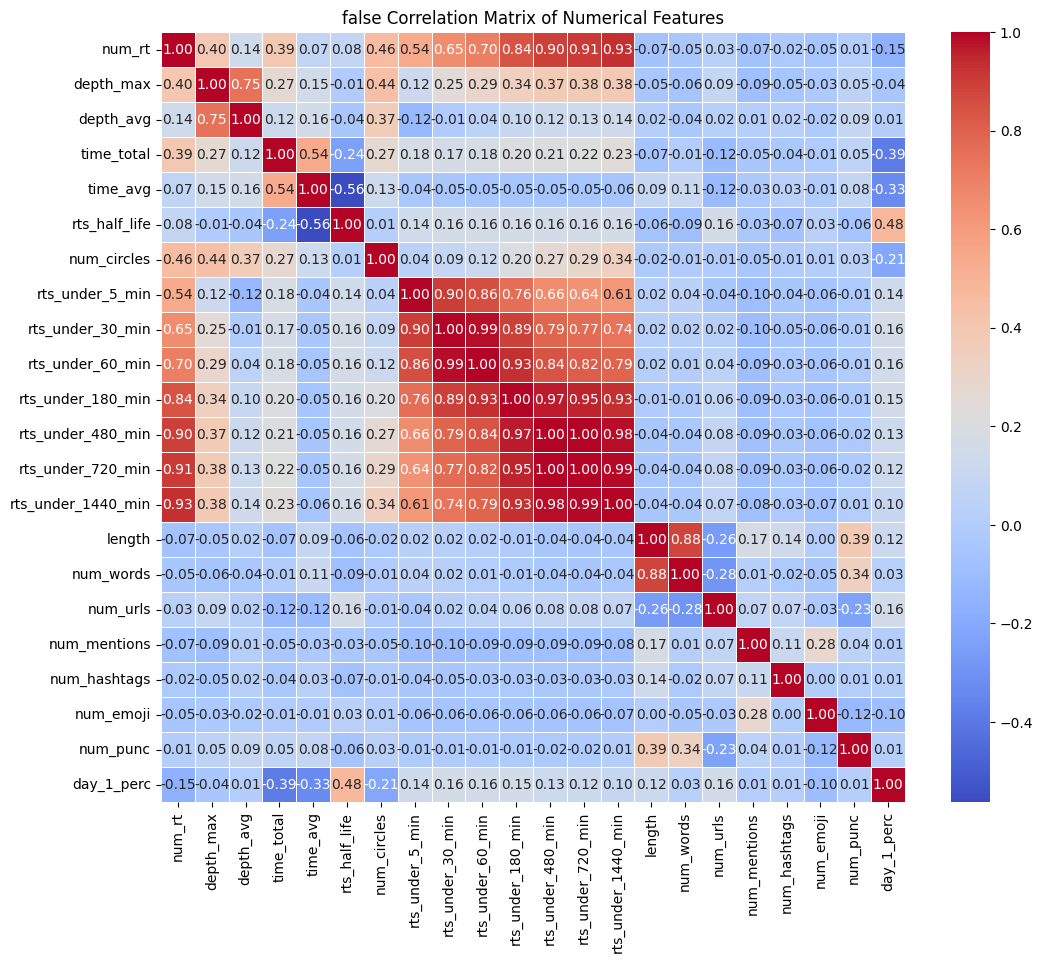

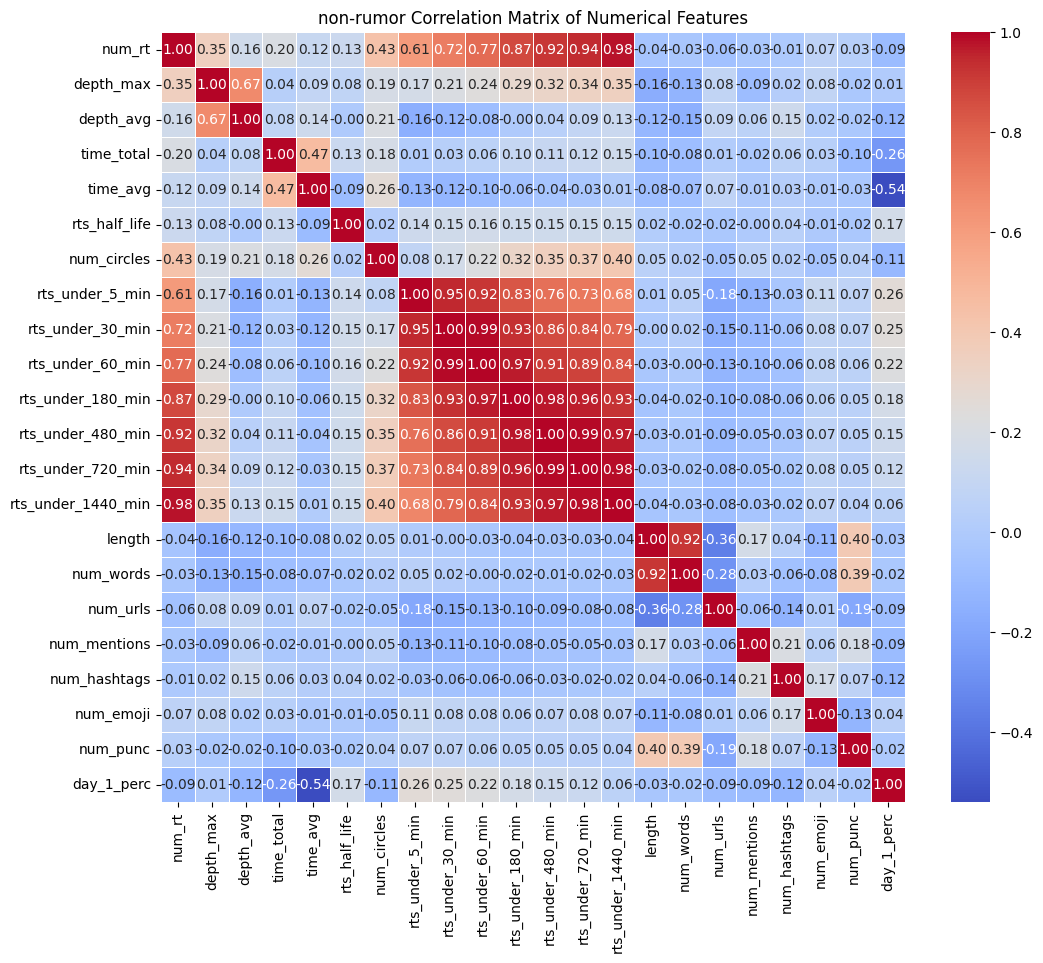

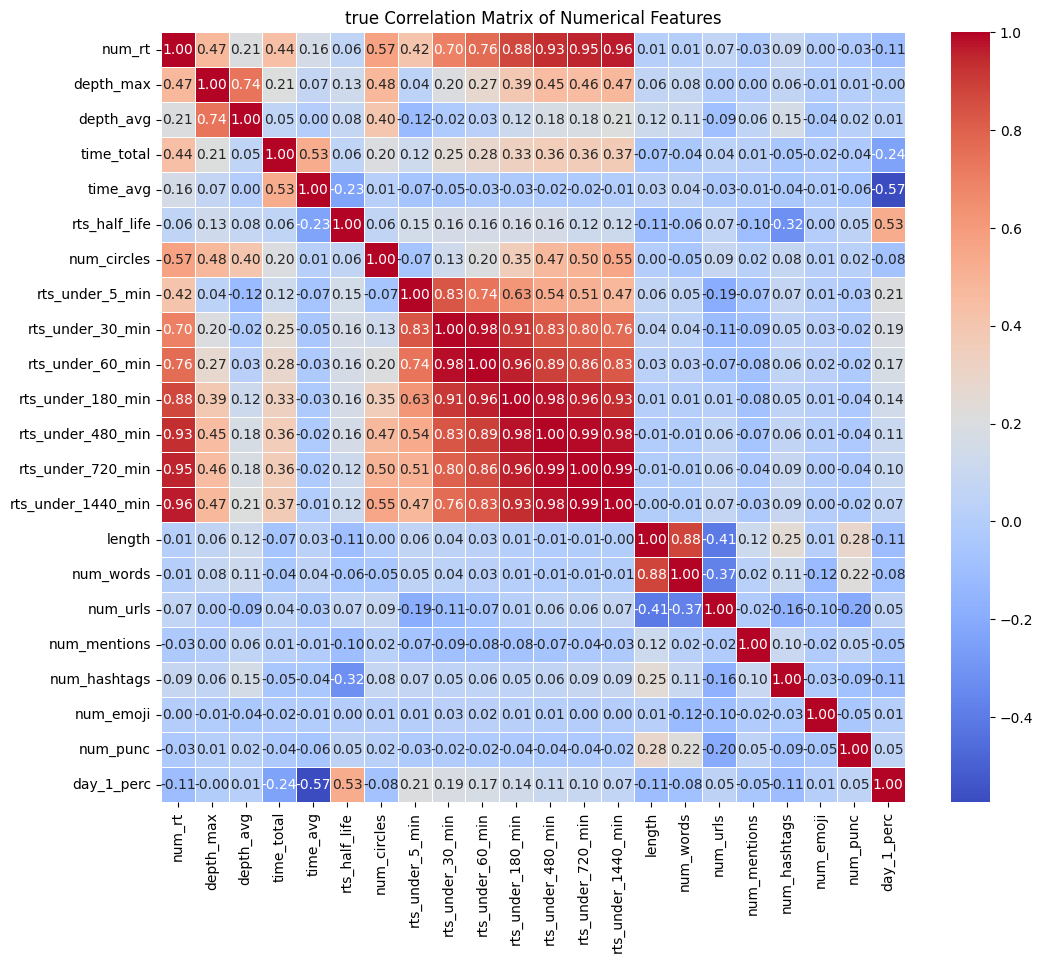

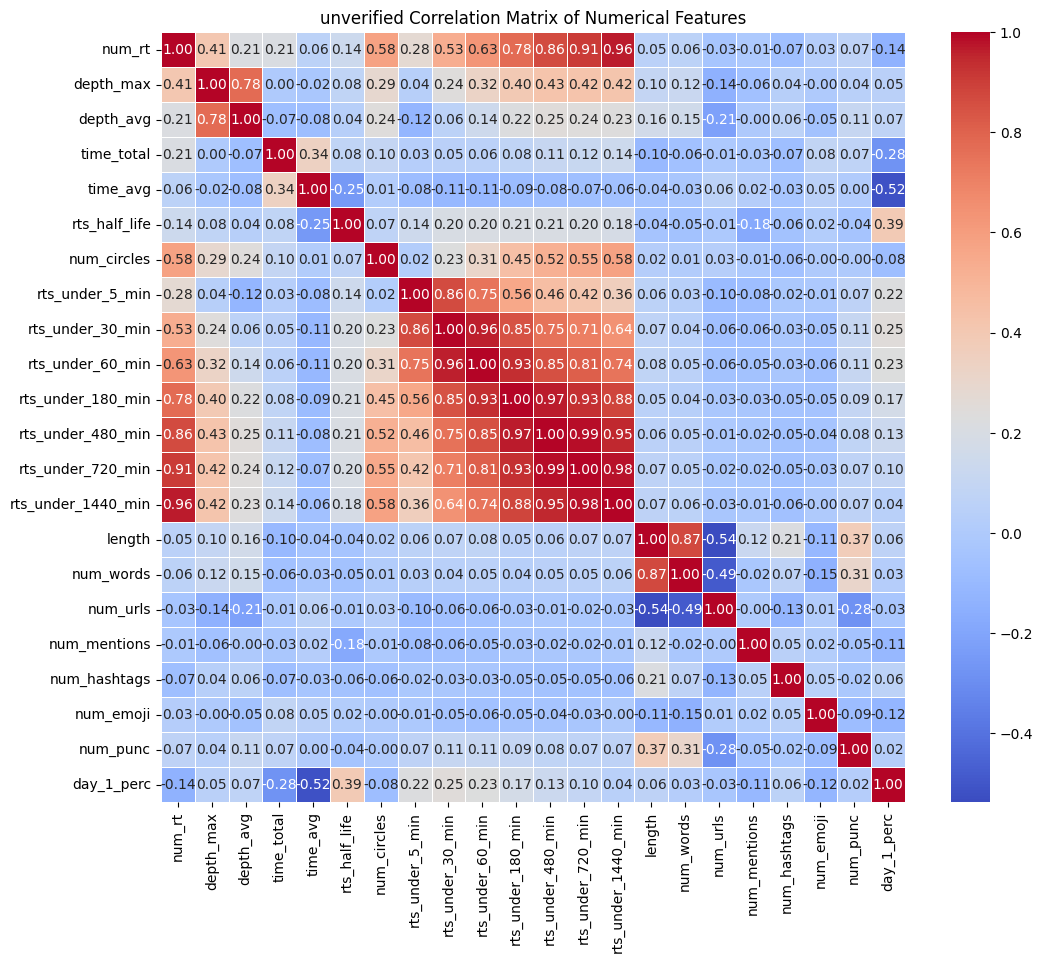

In [13]:
correlation_per_label(dfs, titles)

In [ ]:
# TODO
# most common words